In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import mplhep as hep
from coffea.util import load
from coffea.hist import plot
import os

In [18]:
#output = load('hists_fattag.coffea')
output = load('hists_fattag_local_5file.coffea')
#output = load('hists_fattag_rescaled_withoutPt-470to600.coffea')
output

{'jet_pt': <Hist (dataset,pt) instance at 0x7fd4280f1a50>,
 'jet_eta': <Hist (dataset,eta) instance at 0x7fd40879ed50>,
 'jet_phi': <Hist (dataset,phi) instance at 0x7fd40879ee90>,
 'jet_mass': <Hist (dataset,mass) instance at 0x7fd4087bf150>,
 'btagCMVA': <Hist (dataset,btagCMVA) instance at 0x7fd4087bf290>,
 'btagCSVV2': <Hist (dataset,btagCSVV2) instance at 0x7fd4087bf350>,
 'btagDeepB': <Hist (dataset,btagDeepB) instance at 0x7fd4087bf410>,
 'btagDeepC': <Hist (dataset,btagDeepC) instance at 0x7fd4087bf4d0>,
 'btagDeepFlavB': <Hist (dataset,btagDeepFlavB) instance at 0x7fd4087bf590>,
 'btagDeepFlavC': <Hist (dataset,btagDeepFlavC) instance at 0x7fd4087bf650>,
 'fatjet_tau1': <Hist (dataset,tau1) instance at 0x7fd4087bf710>,
 'fatjet_tau2': <Hist (dataset,tau2) instance at 0x7fd4087bf810>,
 'fatjet_tau21': <Hist (dataset,tau21) instance at 0x7fd4087bf910>,
 'fatjet_pt': <Hist (dataset,pt) instance at 0x7fd4087bfa10>,
 'fatjet_eta': <Hist (dataset,eta) instance at 0x7fd4087bfad0>,
 '

In [19]:
output['fatjet_pt'].values()

{('QCD_Pt-1000toInf_MuEnrichedPt5',): array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.53560889, 1.33902221, 1.33902221,
        0.53560889, 1.07121777, 0.80341333, 0.80341333, 1.8746311 ,
        0.5

jet_pt jet_eta


/work/mmarcheg/miniconda3/envs/coffea_slurm/lib/python3.7/site-packages/coffea/hist/plot.py:44: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn("All sumw are zero!  Cannot compute meaningful error bars", RuntimeWarning)
findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


jet_phi jet_mass
btagCMVA btagCSVV2


/work/mmarcheg/miniconda3/envs/coffea_slurm/lib/python3.7/site-packages/mplhep/plot.py:590: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, None)


btagDeepB btagDeepC
btagDeepFlavB btagDeepFlavC
fatjet_tau1 fatjet_tau2
fatjet_tau21 fatjet_pt
fatjet_eta fatjet_phi
fatjet_mass btagDDBvLV2
btagDDCvLV2 btagDDCvBV2
ccfatjet_tau1 ccfatjet_tau2
ccfatjet_tau21 ccfatjet_pt
ccfatjet_eta ccfatjet_phi
ccfatjet_mass njet
nbjet nel


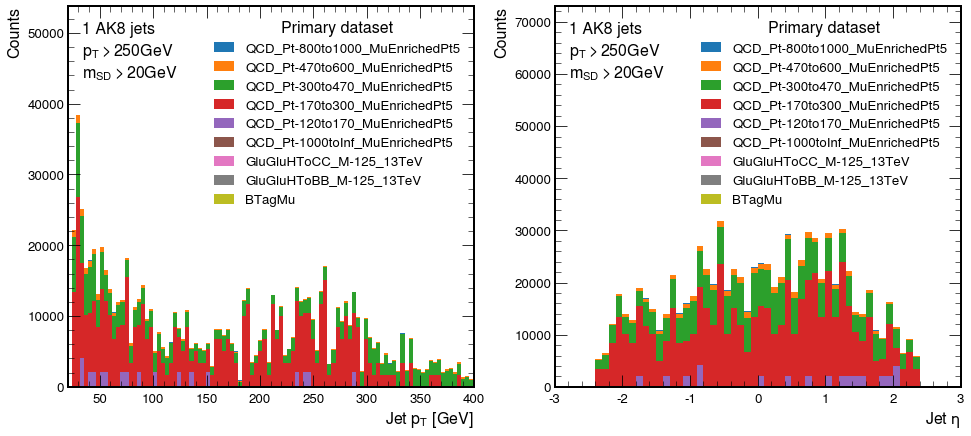

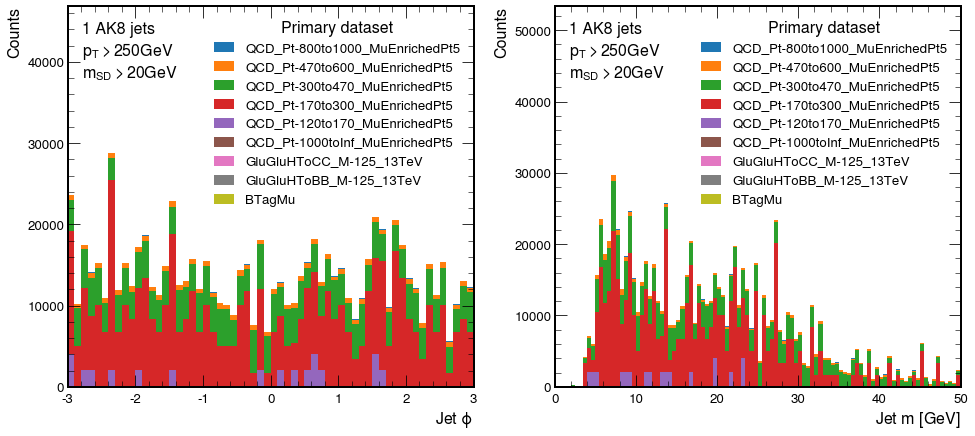

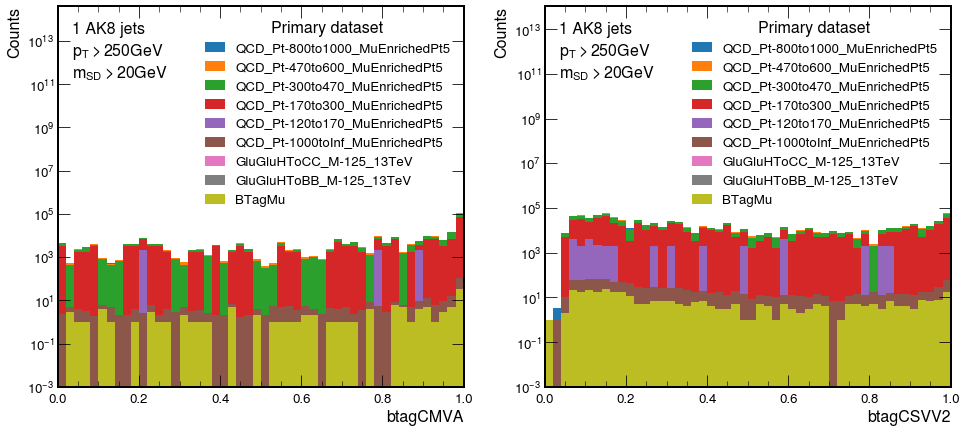

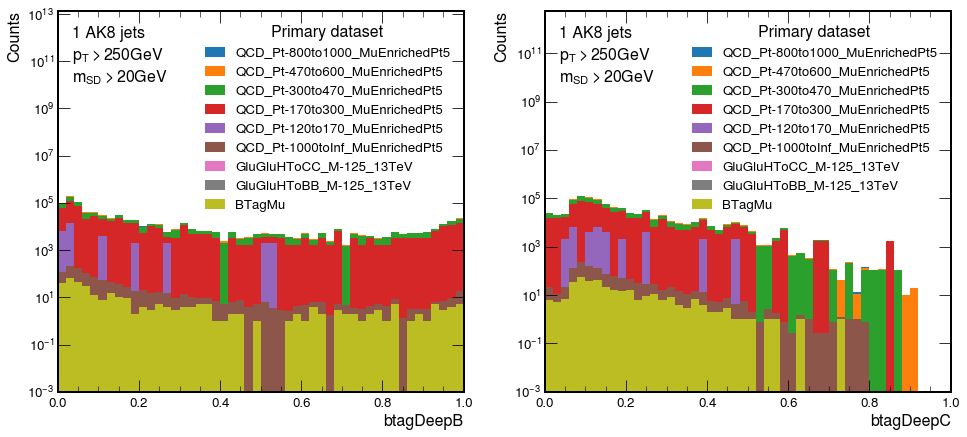

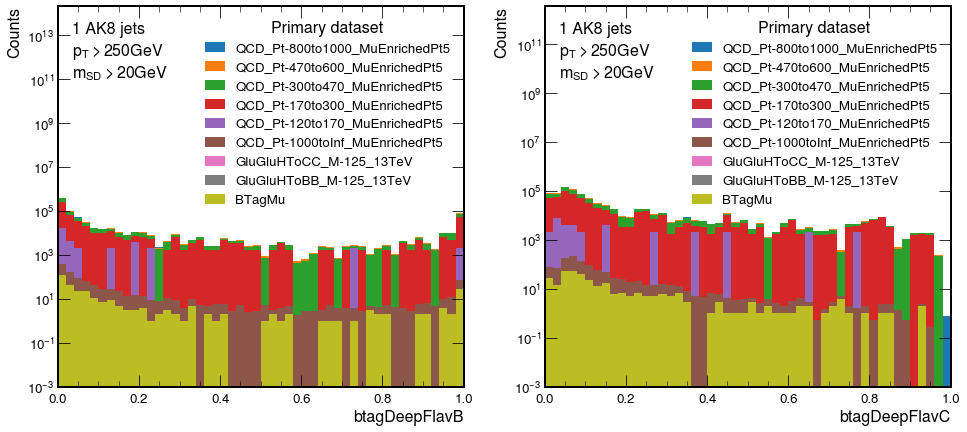

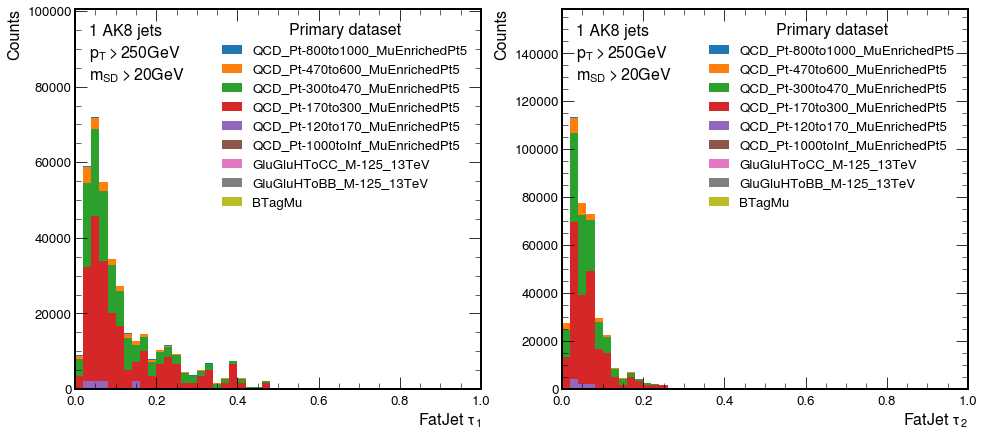

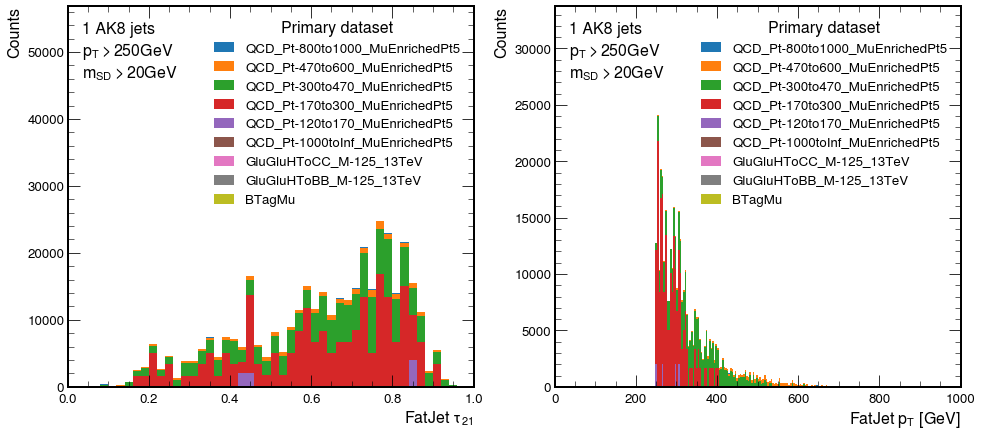

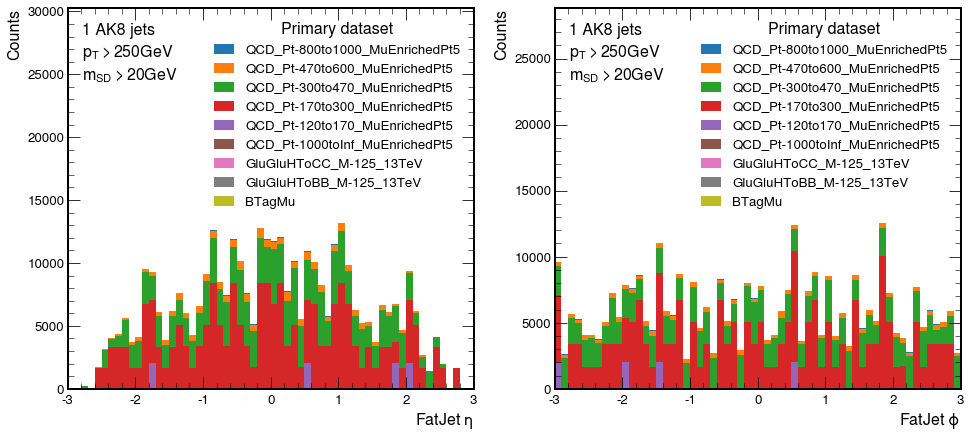

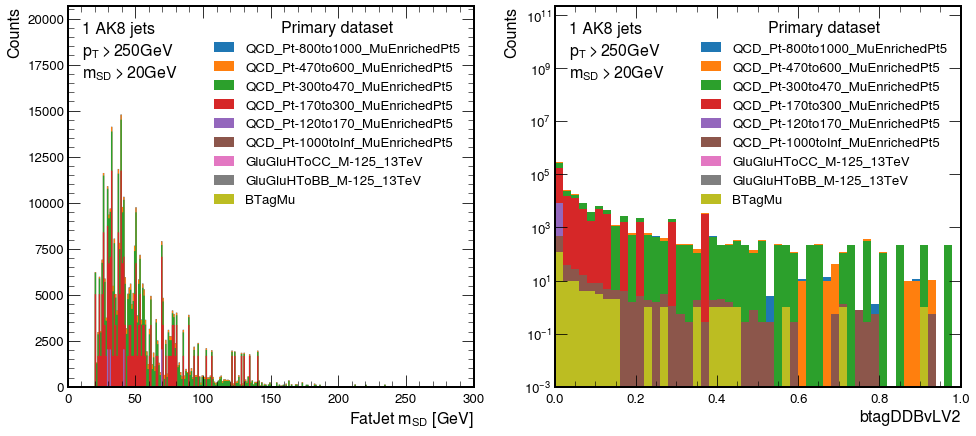

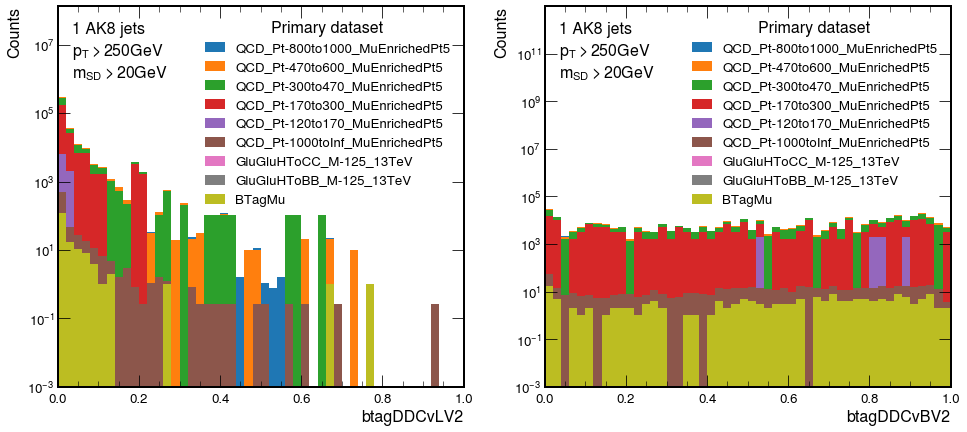

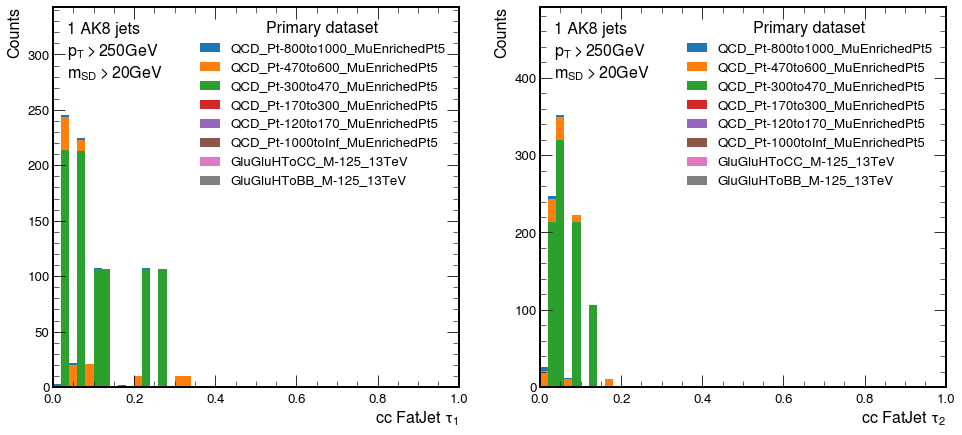

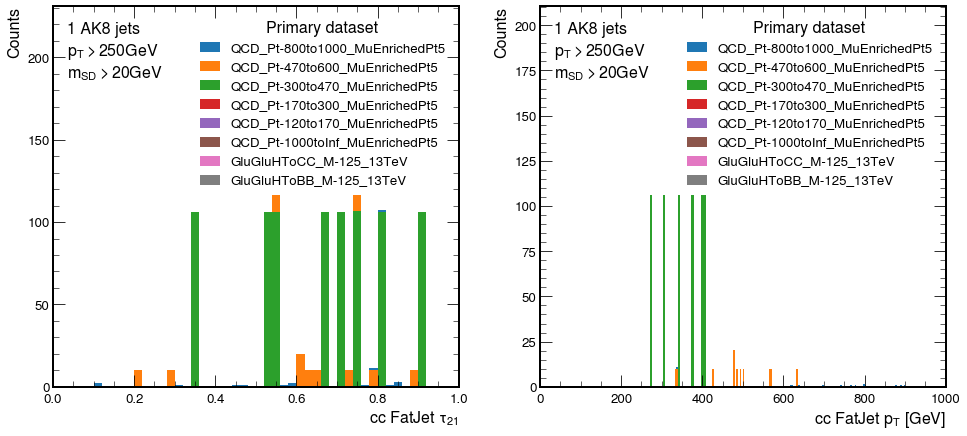

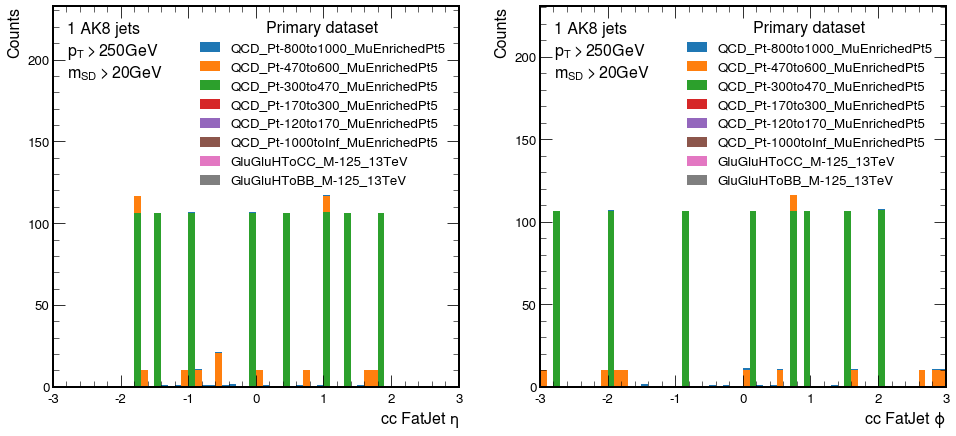

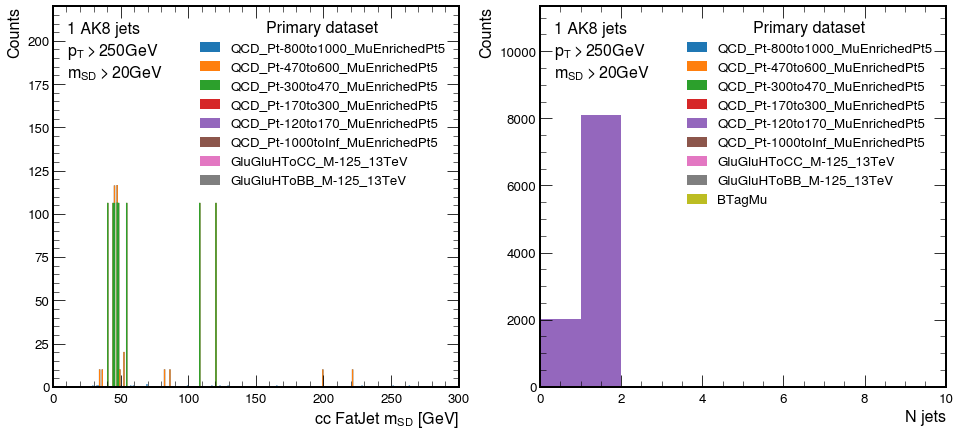

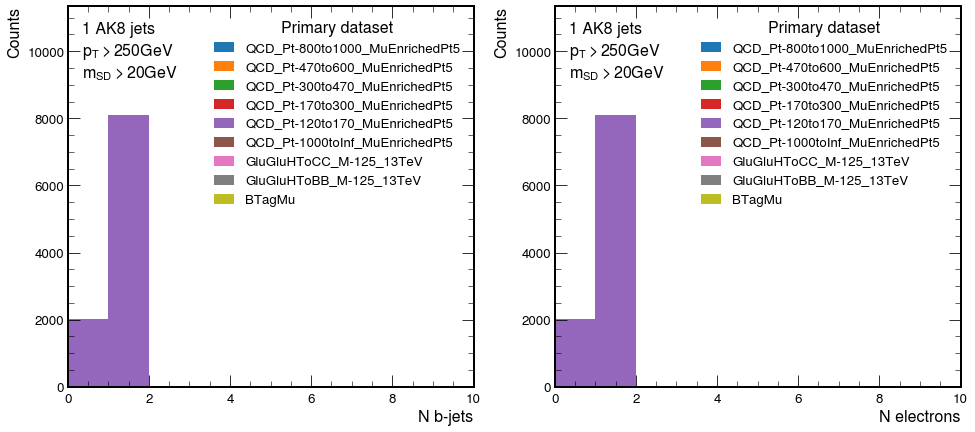

In [20]:
plt.style.use([hep.style.ROOT, {'font.size': 16}])
plot_dir = "plots/"
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

#for i in range(0, int(round(len(output.keys())))-1, 2)[2:]:
for i in range(0, int(round(len(output.keys())))-1, 2):
    h1name = list(output.keys())[i]
    h2name = list(output.keys())[i+1]
    if h1name == "sumw" or h2name == "sumw":
        continue
    print(h1name, h2name)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
    if any([h1name.startswith('cutflow'), h2name.startswith('cutflow')]): break
    h1 = output[h1name]
    h2 = output[h2name]
    dense = False
    
    for ax, h in zip([ax1, ax2], [h1, h2]):
        if hasattr(h, 'dim'):
            plot.plot1d(h, ax=ax, legend_opts={'loc':1}, density=dense, stack=True);
        else:
            continue    
        #break
    for ax, hname in zip([ax1, ax2], [h1name, h2name]):
        at = AnchoredText(r"1 AK8 jets"+"\n"+
                          r"$p_T > 250 GeV$"+"\n"+
                          r"$m_{SD} > 20 GeV$",
                          loc=2, frameon=False)
        ax.add_artist(at)
        if hname.startswith("btag"):
            ax.semilogy()
        ax.set_ylim(0.001, None)
    hep.mpl_magic(ax1)
    hep.mpl_magic(ax2)
    plt.savefig(plot_dir + h1name + "_" + h2name + ".png", dpi=300, format="png")